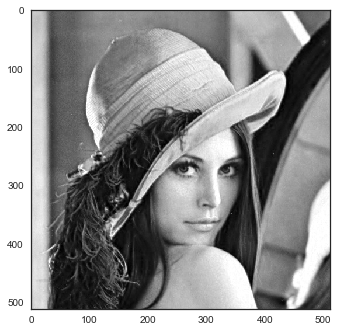

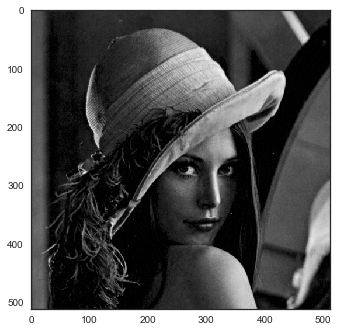

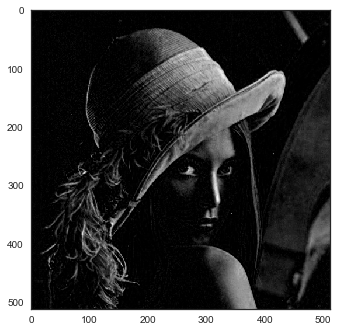

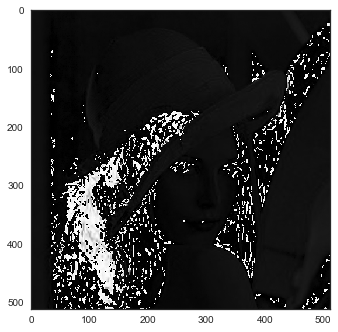

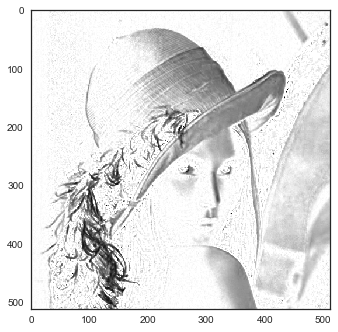

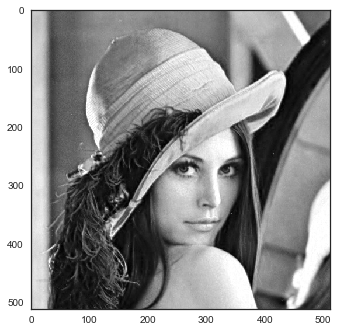

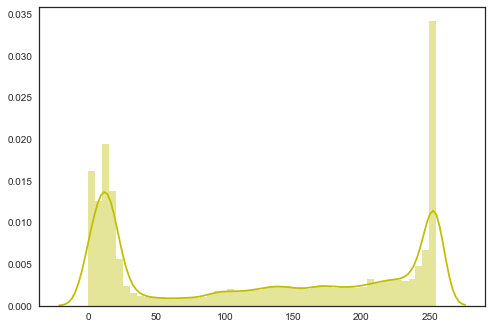

In [2]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
import pandas as pd
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif')
im_RGB =np.asarray(im)
plt.gray()
plt.imshow(im_RGB[:,:,0])
plt.show()
plt.imshow(im_RGB[:,:,1])
plt.show()
plt.imshow(im_RGB[:,:,2])
plt.show()
im = np.asarray(im.convert('HSV'))

plt.gray()
plt.imshow(im[:,:,0])
plt.show()
plt.imshow(im[:,:,1])
plt.show()
plt.imshow(im[:,:,2])
plt.show()

plt.figure()
ax = sns.distplot(im.flatten(), color="y")

In [10]:
im_I = im[:,:,2].copy()
#宣告filter 大小
filter_size = (5,5)
half_filter = np.int((filter_size[0]-1)/2)
average_filter = np.ones(filter_size)/25
print(im_I.shape)

(512L, 512L)


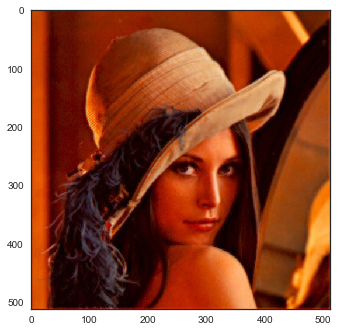

In [30]:
import matplotlib as a

#先幫原圖加上padding
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 255
    vector[-pad_width[1]:] = 255
    return vector
padding_f = np.lib.pad(im_I,half_filter,padwithzeros)
new_pic_I = np.zeros(im_I.shape)
it = np.nditer(new_pic_I,flags = ['multi_index'],op_flags = ['readwrite'])
neighbor_area = np.zeros(filter_size)
while not it.finished:
    neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0]+1,it.multi_index[1]:it.multi_index[1]+filter_size[0]+1]
    it[0] = np.average(neighbor_area.flatten())
    it.iternext()
output_img = im.copy()

output_img[:,:,2] = new_pic_I

output_img_rgb = a.colors.hsv_to_rgb(output_img/255.0)
plt.imshow(output_img_rgb)
plt.show()

In [29]:
output_img/255.0

array([[[ 0.05882353,  0.99215686,  0.90588235],
        [ 0.05882353,  1.        ,  0.88627451],
        [ 0.05882353,  0.99215686,  0.8627451 ],
        ..., 
        [ 0.05098039,  1.        ,  0.70980392],
        [ 0.05098039,  1.        ,  0.76862745],
        [ 0.05098039,  1.        ,  0.79215686]],

       [[ 0.05882353,  0.98823529,  0.88627451],
        [ 0.05882353,  1.        ,  0.85490196],
        [ 0.05882353,  0.98823529,  0.82745098],
        ..., 
        [ 0.05098039,  1.        ,  0.64313725],
        [ 0.05098039,  1.        ,  0.71372549],
        [ 0.05098039,  1.        ,  0.74117647]],

       [[ 0.05882353,  0.98823529,  0.8627451 ],
        [ 0.05882353,  0.98823529,  0.82745098],
        [ 0.05882353,  0.98039216,  0.79215686],
        ..., 
        [ 0.04705882,  1.        ,  0.57254902],
        [ 0.04705882,  1.        ,  0.65882353],
        [ 0.05098039,  1.        ,  0.69411765]],

       ..., 
       [[ 0.04705882,  0.98823529,  0.86666667],
        

In [18]:
im[:,:,0]

array([[15, 15, 15, ..., 13, 13, 13],
       [15, 15, 15, ..., 13, 13, 13],
       [15, 15, 15, ..., 12, 12, 13],
       ..., 
       [12, 13, 14, ...,  4,  6, 10],
       [13, 13, 13, ...,  4,  9, 12],
       [13, 13, 14, ..., 10, 12, 14]], dtype=uint8)